In [1]:
%matplotlib nbagg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


In [2]:
stable_rand = np.random.RandomState(4545)

In [3]:
# w0 * x0 + w1 * x1 + w2 * x2 + b = 0
# x2 = -(w0/w2)*x0 - (w1/w2)*x1 - b/w2 = 0
N = 1000

w0 = 5
w1 = -3
w2 = 2
b = 1

# ラベル1
x0_rand_posi = stable_rand.rand(int(N/2))
x1_rand_posi = stable_rand.rand(int(N/2))
x2_rand_posi = -(w0/w2)*x0_rand_posi - (w1/w2)*x1_rand_posi -b/w2 + stable_rand.rand(int(N/2))

# ラベル2
x0_rand_nega = stable_rand.rand(int(N/2))
x1_rand_nega = stable_rand.rand(int(N/2))
x2_rand_nega = -(w0/w2)*x0_rand_nega - (w1/w2)*x1_rand_nega -b/w2 - stable_rand.rand(int(N/2))

In [4]:
train_x = np.array([np.append(x0_rand_posi,x0_rand_nega,axis=0),np.append(x1_rand_posi,x1_rand_nega,axis=0),np.append(x2_rand_posi,x2_rand_nega,axis=0)])
train_y = np.append(np.ones(int(N/2)),np.zeros(int(N/2)))

<IPython.core.display.Javascript object>


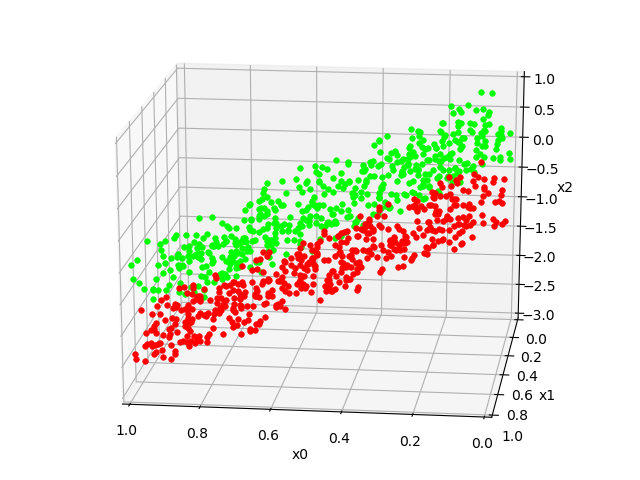

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("x2")
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(-3, 1)
ax.plot(train_x[0,:int(N/2)],train_x[1,:int(N/2)],train_x[2,:int(N/2)],"o",ms=4, mew=0.5,color="#00ff00")
ax.plot(train_x[0,int(N/2):],train_x[1,int(N/2):],train_x[2,int(N/2):],"o",ms=4, mew=0.5,color="#ff0000")
ax.view_init(19, 97)
plt.show()

In [6]:
w = np.ones(3)
b = np.ones(1)

In [7]:
def step(x):
    return 1 * (x > 0)
def predict(x):
    return step(np.dot(w, x) + b)    

In [8]:
w_hist = []
w_hist.append(w)
b_hist = []
b_hist.append(b)

In [9]:
eps = .01
np.random.seed(4)
lerning_order = np.random.choice(np.arange(N),N,replace=False) 
while True:
    fin_flag = True
    for i in lerning_order:
        delta_w = eps * (train_y[i] - predict(train_x[:,i])) * train_x[:,i]
        delta_b = eps * (train_y[i] - predict(train_x[:,i]))
        if all(delta_w == np.zeros(3)) and all(delta_b == np.zeros(1)):
            pass
        else:
            w_hist.append(w + delta_w)
            b_hist.append(b + delta_b)
            w += delta_w
            b += delta_b
        # 一回でも誤り判定があればTrueになる
        fin_flag *= all(delta_w == 0) * (delta_b == 0)
    if fin_flag:
        break
        

In [10]:
# 境界直線を引く
x0_boundary = np.arange(0, 2)
x1_boundary = np.arange(0, 2)
    
x0_boundary, x1_boundary = np.meshgrid(x0_boundary, x1_boundary)
x2_boundary = []
for i in range(len(w_hist)):
    x2_boundary.append(-(w_hist[i][0]/w_hist[i][2])*x0_boundary - (w_hist[i][1]/w_hist[i][2])*x1_boundary - b_hist[i]/w_hist[i][2])

<IPython.core.display.Javascript object>


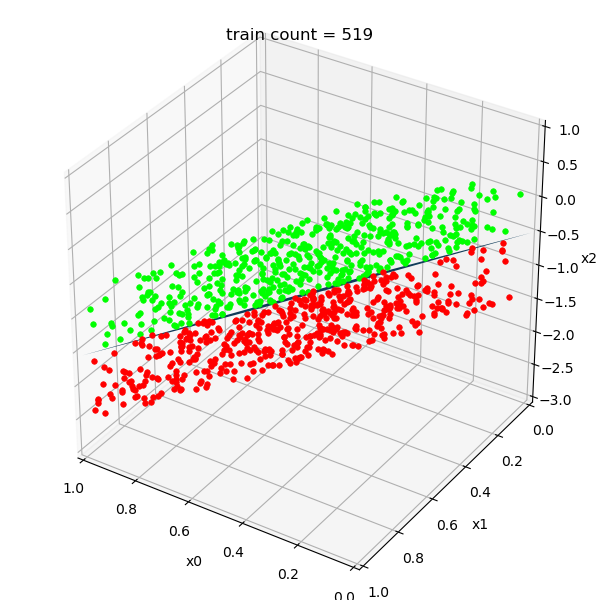

In [11]:
def update_fig(i):
    ax.cla()
    ax.plot(train_x[0,:int(N/2)],train_x[1,:int(N/2)],train_x[2,:int(N/2)],"o",ms=4, mew=0.5,color="#00ff00")
    ax.plot(train_x[0,int(N/2):],train_x[1,int(N/2):],train_x[2,int(N/2):],"o",ms=4, mew=0.5,color="#ff0000")
    ax.plot_surface(x0_boundary,x1_boundary,x2_boundary[i])
    ax.view_init(33, 123)
    ax.set_title('train count = ' + str(i))
    ax.set_xlim3d(0, 1)
    ax.set_ylim3d(0, 1)
    ax.set_zlim3d(-3, 1)
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.set_zlabel("x2")
    

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
anim = animation.FuncAnimation(fig,update_fig,interval=10,frames=len(w_hist))

In [ ]:
#anim.save('simple_perceptron_3d.gif',writer='imagemagick')

In [12]:
len(w_hist)

732